# Workshop de Visão Computacional com Python

Neste notebook, serão apresentados conceitos chave de Visão Computacional através de células de texto que contém a parte teórica, bem como em células de código, para exercitarmos os tópicos discutidos.

**Tópicos:**

1. A percepção visual biológica
2. Introdução à Redes Neurais Convolucionais
3. Entendendo camadas de convolução com ativação ReLU
4. Entendendo camadas de "Maximum Pooling"
6. Exemplo - Treinando uma Convnet

## 1. A percepção visual biológica

No final da década de 60, os cientistas David H. Hubel e Torsten Wiesel realizaram uma série de experimentos em gatos a fim de compreender o funcionamento da percepção visual, e observaram que:

* Cada neurônio do córtex visual reage a estímulos apenas de uma região limitada do campo visual
* Alguns neurônios reagem a padrões de linhas na horizontal, outros na vertical
* Neurônios em níveis superiores reagem a padrões mais complexos e possuem um campo receptivo mais amplo

<img src="https://drive.google.com/uc?id=1EOsS96qRgNFNgeG_YHi8bZErp-308WRf" />

Tais conceitos acabaram influenciando em muito o funcionamento das Redes Neurais Convolucionais. Uma das principais características que torna isso evidente são as várias camadas convolucionais empilhadas cujos neurônios recebem entradas de um campo receptivo da camada anterior, como mostra a imagem abaixo.

<img width="500" src="https://drive.google.com/uc?id=1Hq5v1BbS_PniROG63f174uSCodzt_jQk" />

## 2. Introdução à Redes Neurais Convolucionais

Nosso principal objetivo é **ensinar um computador a enxergar** uma imagem e identificar os objetos nela presente. Para isso, utilizaremos as chamadas "Redes Neurais Convolucionais" (RNCs), também conhecidas como "convnets".

### 2.1 O que é uma imagem?

As imagens são formadas por pixels. Um computador pode lê-las como matrizes onde cada elemento representa a intensidade de cor de um pixel. Na figura abaixo, temos a imagem de um gato, onde seus pixels são nomeados de $x_0$ a $x_N$, cada qual com seu valor, que é proporcional ao seu tom de cinza.

<img width="300" src="https://drive.google.com/uc?id=1LfQESvPmCH4_OAbRmluOk7pY035oX_Ub" />

Geralmente, o valor dos pixels varia entre 0 e 255, pois os LEDs possuem 256 intensidades de brilho. Seguindo essa lógica, podemos dizer que o pixel $x_1$ na imagem possui valor maior que $x_2$, uma vez que o primeiro é mais claro.

Há mais um detalhe, a maioria das imagens possui três canais: R (red), G (green), B (blue), logo, são representadas por três matrizes, como exemplificado abaixo:

<img width="600" src="https://drive.google.com/uc?id=15SYEmo6f2dUIzntNk19jjk5k6SCICBPL" />

### 2.2 Noções gerais de um classificador convolucional

Uma convnet utilizada para a classificação de imagens consiste em duas partes: a **convolutional base** e a **dense head**.

<img width="700" src="https://drive.google.com/uc?id=1K0Z-dyL0YVu1Ec2ri4cY_Vvo7IKp2ZJD" />

A "base" é utilizada para extrair as características mais relevantes de uma imagem. É formada por camadas que realizam a operação de convolução, mas também inclue outros tipos de camada.

A "cabeça" é utilizada pra determinar a classe da imagem. É formada principalmente por camadas densas, mas também pode incluir outros tipos.

### 2.3 O que é uma característica de uma imagem?

Pode ser uma linha, uma cor, uma textura, uma forma, um padrão, ou alguma uma combinação de elementos visuais. Assim, o processo descrito acima, ocorre de fomra similar à imagem abaixo:

<img width="600" src="https://drive.google.com/uc?id=1ntMLbewbzhksVxi51VJONHgq86K6iX9_" />

Note que após passar pela base convolucional, são identificados alguns padrões específicos de carros na imagem, como os vidros, o chassi e as rodas, então essas características passam pelas camadas densas (dense head) o que resulta na classificação do carro.

Uma representação um pouco mais realista da arquitetura geral de uma convnet é apresentada na figura abaixo:

<img width=800 src="https://drive.google.com/uc?id=1x3HEZaXATDZSnWxo1RqEL0XgVYiGdhw2" />

### 2.4 A fase de treinamento

O objetivo da rede durante o treinamento é aprender duas coisas:

1. quais características extrair de uma imagem (base),
2. qual classe combina com aquelas características (head).

## 3. Entendendo camadas de convolução com ativação ReLU

### 3.1 Mas afinal, o que é uma convolução?

A convolução nada mais é que a operação de **multiplicação entre duas matrizes**: a matriz que representa a imagem original por uma matriz menor chamada de "Filtro". O processo é descrito a seguir:

1. O elemento central do filtro se alinha com um elemento da matriz da imagem
2. É realizada a multiplicação matricial das duas regiões, gerando um novo elemento
3. O processo se repete até o filtro percorrer todos elementos da imagem original, resultando em uma matriz chamada de "Mapa de Características"


<img width=700 src="https://drive.google.com/uc?id=1E3U7eRE9jzGSomjJnqxa-FW91_3MJSvN" />

Exemplo com animação:

<img width=300 src="https://drive.google.com/uc?id=1PC354lktxWStkWj0ahcuYfvwHfxLbaB6" />  <img width=400 src="https://drive.google.com/uc?id=1rZI1Q1qfObFRdiLR3hJsn6to9i0sZpTl" />

Como já comentado no início desse material, o efeito da convolução é **destacar determinadas características** de uma imagem, gerando "Mapas de Características". Cada um desses mapas é gerado por um "filtro" específico, cujos valores foram calculados durante o treinamento da rede neural, de forma a melhorar a performance do modelo.

Na imagem abaixo, vamos um exemplo de dois "Mapas de Características" gerados pela aplicação de dois filtros distintos em uma imagem, um deles realça linhas verticais, e o outro horizontais.

<img width="800" src="https://drive.google.com/uc?id=15Hc0apnpGb4AK57lHQLnv-j5DyPLCb-J" />

### 3.2 Parâmetros relevantes em RNCs

#### Stride

O passo com que o filtro de convolução se move pela matriz da imagem original.

<img width="400" src="https://drive.google.com/uc?id=1Sonvywtrtop0VTEwlHM3E-4cw5oZuqAY" />

#### Padding

Define se a convolução será feita considerando pixels zerados nas bordas da imagem inicial (padding='same'), para preservar o tamanho da imagem, ou não (padding='valid').

<img width="500" src="https://drive.google.com/uc?id=1SHbgNalLIR11y8uMD6S0Ns183j2jnqL5" />

### 3.3 Observação

Depois da convolução, os mapas de características passam por uma função de ativação que detecta as features mais importantes dentre as filtradas em cada um. Um exemplo de função de ativação muito utilizada é a ReLU (rectifier function unit), apresentada na figura abaixo.

<img width="450" src="https://drive.google.com/uc?id=14zDL0sFVWxFEfJgglEVHueiQsmgkxHPH" />

### 3.4 Testando camadas de convolução com Keras

In [ ]:
# Importando o tensorflow e matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Código para ler a imagem no google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo a imagem com o tensorflow

image = tf.io.read_file('car_feature.jpg')
image = tf.io.decode_jpeg(image)

In [ ]:
image.shape

TensorShape([361, 421, 1])

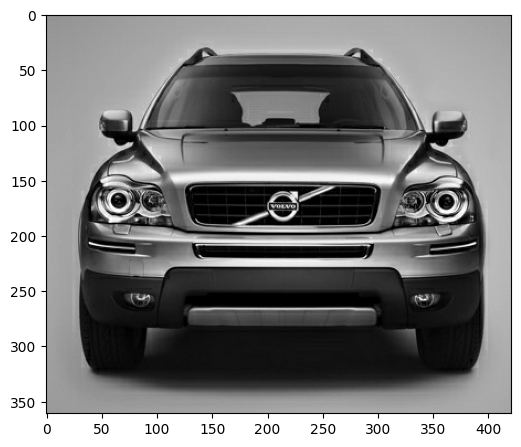

In [ ]:
# Plotando a figura lida

plt.figure(figsize=(6, 6))
_=plt.imshow(tf.squeeze(image), cmap='gray')

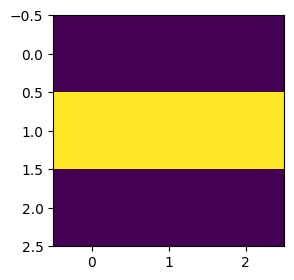

In [ ]:
# Criando um filtro de teste
kernel = tf.constant([
    [-1, -1, -1],
    [ 2,  2,  2],
    [-1, -1, -1],
])

# Plotando filtro de teste
plt.figure(figsize=(3, 3))
_=plt.imshow(kernel)

* Alguns exemplos de filtros para teste:
https://aishack.in/tutorials/image-convolution-examples/

In [ ]:
# Reformatando a imagem:

image_format = tf.image.convert_image_dtype(image, dtype=tf.float32)
image_format = tf.expand_dims(image_format, axis=0)

In [ ]:
# Reformatando kernel

kernel_format = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel_format = tf.cast(kernel_format, dtype=tf.float32)

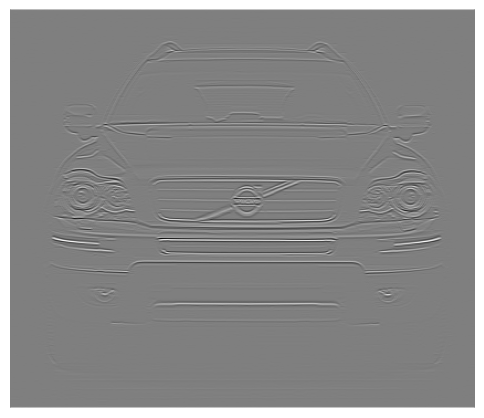

In [ ]:
# Aplicando o filtro e plotando:

image_filter = tf.nn.conv2d(
    input=image_format,
    filters=kernel_format,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.axis('off')
plt.show();

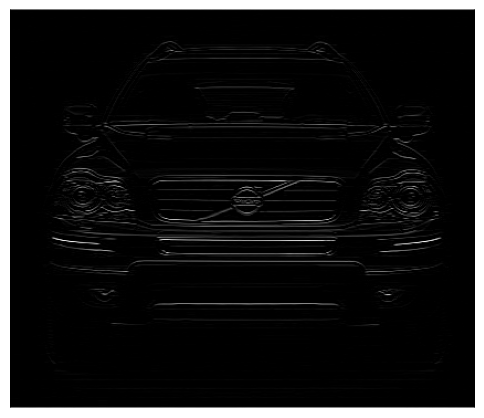

In [ ]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect), cmap='gray')
plt.axis('off')
plt.show();

## 4. Entendendo camadas de "Maximum Pooling"

O objetivo de se utilizar as camadas de pooling é condensar a imagem, reduzindo a quantidade de parâmetros treináveis e realçar as características detectadas na camada de convolução. Isso é feito da seguinte forma:

1. Uma matriz de pooling percorre a matriz original da imagem
2. Em cada região percorrida, apenas o pixel de maior intensidade é escolhido para compor uma nova imagem
3. Assim o tamanho da nova imagem é reduzido e suas características principais são realçadas

<img width="1000" src="https://drive.google.com/uc?id=1s3boof-AL33i8oCSjezeJjPNH8wCoR1e" />

Exemplo de Max Pooling com Matriz 2x2:

<img width="500" src="https://drive.google.com/uc?id=15ITzgVj_HohCGB-GNs3JuLm9Gr--OPdI" />

## 5. Exemplo - Treinando uma Convnet (MNIST)

Agora faremos um exemplo de RNC para reconhecimento de números escritos em imagens.

Importar as bibliotecas a serem utilizadas pela rede convolucional

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Definir a arquitetura da rede convolucional, conforme o diagrama abaixo:

<img src="https://drive.google.com/uc?id=1sLKg5WDFEY4aN8GzzRouZrQJvb3evZzV" />

Construímos então uma classe para representá-la:

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

A função __init__ define a arquitetura central do modelo, ou seja, todas as camadas com o número de neurônios em cada camada. E a função forward, como o nome sugere, faz um forward pass na rede. Portanto, inclui todas as funções de ativação em cada camada, bem como qualquer pooling ou dropout usado após qualquer camada.

Observe que a primeira camada convolucional tem uma entrada de 1 canal, uma saída de 16 canais, um tamanho de kernel de 3 e uma passada de 1.

Definimos então a rotina de treinamento.

In [ ]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.			item()))

Semelhante à rotina de treinamento anterior, escrevemos uma rotina de teste que pode ser usada para avaliar o desempenho do modelo no conjunto de testes:

In [ ]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, 		 keepdim=True)  # us argmax to get the most 		 likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()
    loss /= len(test_dataloader.dataset)
    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))

A seguir, chegamos a outro componente crítico deste exercício, que é o carregamento do conjunto de dados. Graças ao módulo DataLoader do PyTorch, podemos configurar o mecanismo de carregamento do conjunto de dados em algumas linhas de código.

In [ ]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))
                   ])),
    batch_size=500, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 92148426.23it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69980181.30it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22473967.02it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5343766.84it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Agora vamos dar uma olhada nos dados baixados.

In [ ]:
examples = enumerate(train_dataloader)
batch_idx, (example_data, example_targets) = next(examples)

Ok, vamos ver em que consiste um lote de dados de teste.

In [ ]:
example_data.shape

torch.Size([32, 1, 28, 28])

Isso significa que temos 32 exemplos de 28x28 pixels em escala de cinza (ou seja, sem canais RGB, daí esse). Podemos plotar alguns deles usando matplotlib.

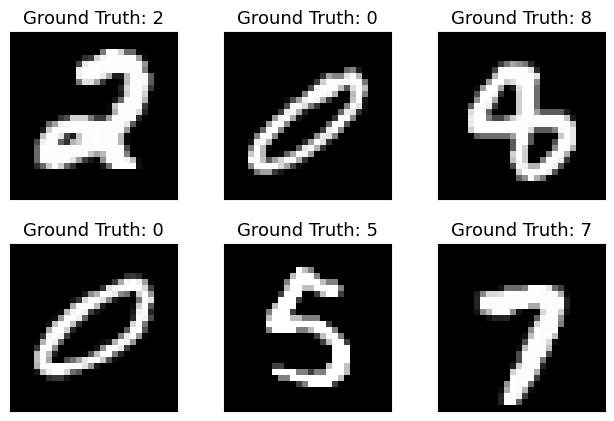

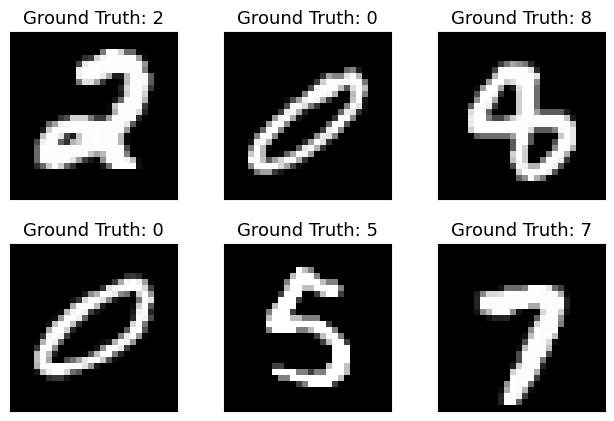

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]), fontsize=13)
  plt.xticks([])
  plt.yticks([])
fig

Definimos a rotina de treinamento anteriormente. Agora é a hora de definir qual otimizador e dispositivo usaremos para executar o treinamento do modelo. E finalmente obteremos o seguinte:

In [ ]:
torch.manual_seed(0)
device = torch.device("cpu")
model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

E então iniciamos o processo real de treinamento do modelo para k número de épocas e também continuamos testando o modelo no final de cada época de treinamento:

In [ ]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


epoch: 1 [0/60000 (0%)]	 training loss: 2.310609
epoch: 1 [320/60000 (1%)]	 training loss: 1.924133
epoch: 1 [640/60000 (1%)]	 training loss: 1.313336
epoch: 1 [960/60000 (2%)]	 training loss: 0.796470
epoch: 1 [1280/60000 (2%)]	 training loss: 0.819801
epoch: 1 [1600/60000 (3%)]	 training loss: 0.678430
epoch: 1 [1920/60000 (3%)]	 training loss: 0.477187
epoch: 1 [2240/60000 (4%)]	 training loss: 0.529062
epoch: 1 [2560/60000 (4%)]	 training loss: 0.468829
epoch: 1 [2880/60000 (5%)]	 training loss: 0.242887
epoch: 1 [3200/60000 (5%)]	 training loss: 0.519633
epoch: 1 [3520/60000 (6%)]	 training loss: 0.262872
epoch: 1 [3840/60000 (6%)]	 training loss: 0.467795
epoch: 1 [4160/60000 (7%)]	 training loss: 0.417298
epoch: 1 [4480/60000 (7%)]	 training loss: 0.316030
epoch: 1 [4800/60000 (8%)]	 training loss: 0.498437
epoch: 1 [5120/60000 (9%)]	 training loss: 0.157880
epoch: 1 [5440/60000 (9%)]	 training loss: 0.364403
epoch: 1 [5760/60000 (10%)]	 training loss: 0.085984
epoch: 1 [6080/60

Agora que treinamos um modelo, com um desempenho razoável do conjunto de testes, também podemos verificar manualmente se a inferência do modelo em uma imagem de amostra está correta:

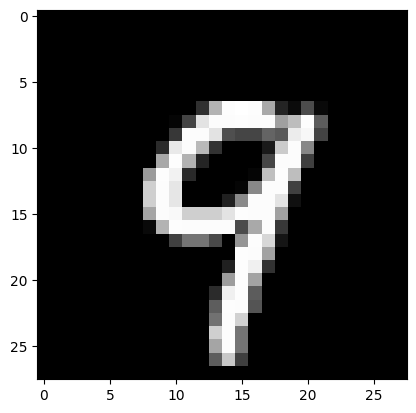

In [ ]:
image_index = 12

test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[image_index][0], cmap='gray', interpolation='none')

E agora executamos a inferência do modelo para esta imagem e a comparamos com a verdade básica:

In [ ]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][image_index]}")
print(f"Ground truth is : {sample_targets[image_index]}")

Model prediction is : 9
Ground truth is : 9


Procurando exemplos de imagens que foram classificadas errado.

In [ ]:
pred = model(sample_data)
predictions = pred.data.max(1)[1]

for i in range(500):
  if sample_targets[i].item() != predictions[i].item():
    print(f'Deu ruim na imagem de indice {i}')
    print(f'esperado: {sample_targets[i]}, calculado: {model(sample_data).data.max(1)[1][i]}')

Deu ruim na imagem de indice 259
esperado: 6, calculado: 0
Deu ruim na imagem de indice 320
esperado: 9, calculado: 8
Deu ruim na imagem de indice 321
esperado: 2, calculado: 7
Deu ruim na imagem de indice 445
esperado: 6, calculado: 0
Deu ruim na imagem de indice 449
esperado: 3, calculado: 5


Matriz de confusão para problemas de classificação entre duas classes:

<img width="400" src="https://drive.google.com/uc?id=1Tl8EMSJ0xYGu32pKAsYDYwzLrQMhe1i7" />

Gerando a matriz de confusão do modelo em cima da base de teste:

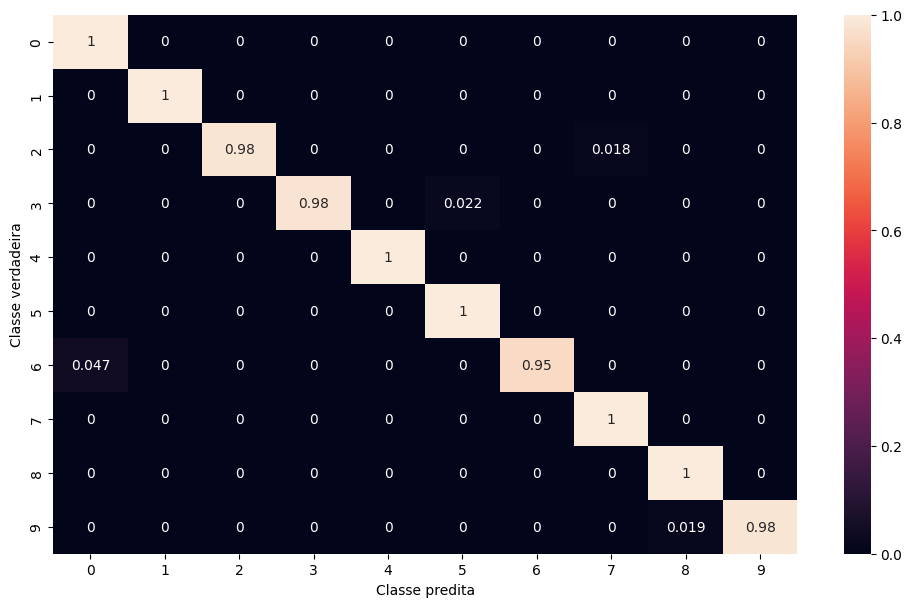

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

y_pred = []
y_true = []

for i in range(500):
  ideal = sample_targets[i]
  y_pred.append(predictions[i].item())
  y_true.append(ideal.item())

cf_matrix = confusion_matrix(y_true, y_pred)

classes = ['0','1','2','3','4','5','6','7','8','9']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
fig = sn.heatmap(df_cm, annot=True)
_=fig.set(xlabel='Classe predita', ylabel='Classe verdadeira')

## Contatos ATECH:

Nomes (igual ao linkedin) e Emails:

* Julian Drumov Gonçalves Simioni - jsimioni@atech.com.br
* Beatriz da Mota Bonanno - bmbonanno@atech.com.br
* Rogerio Yugo Takimoto - rtakimoto@atech.com.br
* Marcos Henrique Mansano Vogel - mvogel@atech.com.br